In [2]:
%load_ext autoreload
%autoreload 2
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split
import sys
import numpy as np
import time
from datetime import datetime
import pytz
import matplotlib.pyplot as plt
print(f"Pytorch Version: {torch.__version__}")
print(f"Python Version: {sys.version}")
print(f"GPU is", "available" if torch.cuda.is_available() else "not available")
print(torch.cuda.get_device_name(0))

from model import *
from custom_dataset import *
from utils import *

Pytorch Version: 1.7.1+cu110
Python Version: 3.7.10 (default, Feb 26 2021, 13:06:18) [MSC v.1916 64 bit (AMD64)]
GPU is available
NVIDIA GeForce GTX 1070


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
features = pd.read_csv('processed_dataset/features.csv')
results = pd.read_csv('processed_dataset/results.csv')

# performing train validation test split of 0.8,0.1,0.1 ratio
X_train, X_rem, y_train, y_rem = train_test_split(features,results, train_size=0.8, random_state=10)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, train_size=0.5, random_state=10)
num_features = X_train.shape[1]-1

In [5]:
# initializing custom train, val, test dataset
train = Custom_Training_Dataset(X_train.drop(columns=['tweet_id']),y_train)
valid = Custom_Validation_Dataset(X_valid.drop(columns=['tweet_id']),y_valid)
test = Custom_Testing_Dataset(X_test.drop(columns=['tweet_id']),y_test)

# initializing dataloader with allocated batchsize
batch_size_value = 256
train_loader = DataLoader(train, batch_size=batch_size_value, shuffle=True)
val_loader = DataLoader(valid, batch_size=batch_size_value, shuffle=True)
test_loader = DataLoader(test, batch_size=batch_size_value, shuffle=True)

In [6]:
# checking
dataiter = iter(train_loader)
X,y = dataiter.next()
print(f'Number of training samples: {len(train)}')
print(f'Number of batches of training samples: {len(train_loader)}')
print(f'shape of training samples in first batch of train_loader: {X.shape}')

Number of training samples: 1529656
Number of batches of training samples: 5976
shape of training samples in first batch of train_loader: torch.Size([256, 299])


In [9]:
# initialising general model hyperparameters
epochs = 250
learning_rate = 0.0000001
criterion = MSLE_Loss()
dropout = 0.5
model_name = f'5_layer_256_BN_dropout'
model = nn_Regression(input_features = num_features, dropout= dropout, model_name=model_name)
model.to('cuda')

# training model
model,train_loss,val_loss,epochs = train_model(learning_rate = learning_rate,
                                               train_loader = train_loader,
                                               val_loader = val_loader,
                                               dropout = dropout, 
                                               num_features = num_features,
                                               criterion = criterion,
                                               epochs = epochs,
                                               model_name = model_name,
                                               model = model)

## The kernel output below shows the training from epoch 150 - 400.
## Please pardon the wrong epoch numbers below :(

Epoch: 221/370 -  Time: 2021-08-07 11:40:33.454188+08:00  Training Loss: 1.091 -  Validation Loss: 1.071 - 
Epoch: 222/370 -  Time: 2021-08-07 11:41:54.758874+08:00  Training Loss: 0.648 -  Validation Loss: 0.720 - 
Epoch: 223/370 -  Time: 2021-08-07 11:43:19.166481+08:00  Training Loss: 0.615 -  Validation Loss: 0.627 - 
Epoch: 224/370 -  Time: 2021-08-07 11:44:40.878612+08:00  Training Loss: 0.598 -  Validation Loss: 0.589 - 
Epoch: 225/370 -  Time: 2021-08-07 11:46:02.791493+08:00  Training Loss: 0.586 -  Validation Loss: 0.567 - 
Epoch: 226/370 -  Time: 2021-08-07 11:47:24.204123+08:00  Training Loss: 0.578 -  Validation Loss: 0.548 - 
Epoch: 227/370 -  Time: 2021-08-07 11:48:46.938094+08:00  Training Loss: 0.567 -  Validation Loss: 0.710 - 
Epoch: 228/370 -  Time: 2021-08-07 11:50:08.470852+08:00  Training Loss: 0.558 -  Validation Loss: 0.535 - 
Epoch: 229/370 -  Time: 2021-08-07 11:51:30.548163+08:00  Training Loss: 0.550 -  Validation Loss: 0.531 - 
Epoch: 230/370 -  Time: 2021

Epoch: 297/370 -  Time: 2021-08-07 13:23:56.288469+08:00  Training Loss: 0.365 -  Validation Loss: 0.357 - 
Epoch: 298/370 -  Time: 2021-08-07 13:25:18.390489+08:00  Training Loss: 0.364 -  Validation Loss: 0.348 - 
Epoch: 299/370 -  Time: 2021-08-07 13:26:39.631129+08:00  Training Loss: 0.362 -  Validation Loss: 0.382 - 
Epoch: 300/370 -  Time: 2021-08-07 13:28:00.632745+08:00  Training Loss: 0.362 -  Validation Loss: 0.337 - 
Epoch: 301/370 -  Time: 2021-08-07 13:29:21.884525+08:00  Training Loss: 0.361 -  Validation Loss: 0.338 - 
Epoch: 302/370 -  Time: 2021-08-07 13:30:43.202064+08:00  Training Loss: 0.360 -  Validation Loss: 0.340 - 
Epoch: 303/370 -  Time: 2021-08-07 13:32:04.305975+08:00  Training Loss: 0.359 -  Validation Loss: 0.335 - 
Epoch: 304/370 -  Time: 2021-08-07 13:33:25.204876+08:00  Training Loss: 0.357 -  Validation Loss: 0.434 - 
Epoch: 305/370 -  Time: 2021-08-07 13:34:46.436862+08:00  Training Loss: 0.358 -  Validation Loss: 0.343 - 
Epoch: 306/370 -  Time: 2021

Epoch: 373/370 -  Time: 2021-08-07 15:10:29.831394+08:00  Training Loss: 0.320 -  Validation Loss: 0.423 - 
Epoch: 374/370 -  Time: 2021-08-07 15:12:01.068174+08:00  Training Loss: 0.318 -  Validation Loss: 0.305 - 
Epoch: 375/370 -  Time: 2021-08-07 15:13:24.341860+08:00  Training Loss: 0.318 -  Validation Loss: 0.330 - 
Epoch: 376/370 -  Time: 2021-08-07 15:14:48.542186+08:00  Training Loss: 0.319 -  Validation Loss: 0.299 - 
Epoch: 377/370 -  Time: 2021-08-07 15:16:10.702399+08:00  Training Loss: 0.319 -  Validation Loss: 0.318 - 
Epoch: 378/370 -  Time: 2021-08-07 15:17:34.495857+08:00  Training Loss: 0.321 -  Validation Loss: 0.357 - 
Epoch: 379/370 -  Time: 2021-08-07 15:19:00.432020+08:00  Training Loss: 0.317 -  Validation Loss: 0.296 - 
Epoch: 380/370 -  Time: 2021-08-07 15:20:27.012492+08:00  Training Loss: 0.317 -  Validation Loss: 0.313 - 
Epoch: 381/370 -  Time: 2021-08-07 15:21:53.380661+08:00  Training Loss: 0.316 -  Validation Loss: 0.296 - 
Epoch: 382/370 -  Time: 2021

Epoch: 449/370 -  Time: 2021-08-07 16:58:14.870459+08:00  Training Loss: 0.304 -  Validation Loss: 0.378 - 
Epoch: 450/370 -  Time: 2021-08-07 16:59:36.927892+08:00  Training Loss: 0.304 -  Validation Loss: 0.288 - 
Epoch: 451/370 -  Time: 2021-08-07 17:00:59.485492+08:00  Training Loss: 0.303 -  Validation Loss: 0.282 - 
Epoch: 452/370 -  Time: 2021-08-07 17:02:21.546892+08:00  Training Loss: 0.303 -  Validation Loss: 0.294 - 
Epoch: 453/370 -  Time: 2021-08-07 17:03:43.440946+08:00  Training Loss: 0.302 -  Validation Loss: 0.306 - 
Epoch: 454/370 -  Time: 2021-08-07 17:05:05.464512+08:00  Training Loss: 0.303 -  Validation Loss: 0.286 - 
Epoch: 455/370 -  Time: 2021-08-07 17:06:27.249241+08:00  Training Loss: 0.303 -  Validation Loss: 0.290 - 
Epoch: 456/370 -  Time: 2021-08-07 17:07:49.212673+08:00  Training Loss: 0.303 -  Validation Loss: 0.285 - 
Epoch: 457/370 -  Time: 2021-08-07 17:09:11.316830+08:00  Training Loss: 0.303 -  Validation Loss: 0.286 - 
Epoch: 458/370 -  Time: 2021

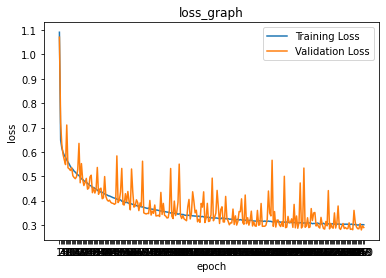

In [10]:
# ploting regression loss curves
# from epoch 150 - 400
plot_curves(train_loss=train_loss,val_loss=val_loss,epochs=epochs)